In [29]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Oct  8 09:38:57 2022

@author: Thierry Paquet
"""

#!/usr/bin/env python
# -*- coding: utf-8 -*-


import numpy as np
from sklearn import datasets
from sklearn.cluster import DBSCAN
from numpy.linalg import norm
import matplotlib.pyplot as plt

import sklearn.cluster

colors =['k','r','b','g','c','m',]
n_colors = 6

###########################################################################
def EpsilonVoisinage(i,X,Dist,eps):
    N,p =np.shape(X)
    Voisins = [v for v in range(N) if ( i != v and Dist[v,i] < eps)]
    return Voisins

###########################################################################
def etendre_cluster(X, y, Dist, Cluster, no_cluster, Voisins, Visite, eps, minpts):
    for v in Voisins:
       if not Visite[v]:
           Visite[v]=True
           if y[v]!=-1:
                Cluster.append(v)
                y[v]=no_cluster
                vosin_= EpsilonVoisinage(v,X,Dist,eps)
                if len(vosin_)>=minpts:
                    for vv in vosin_:
                        if vv not in voisins:
                           voisins.concatenate(vv)
        
    return Cluster, y, Visite

##########################################################################
#              MY DBSCAN
def my_DBSCAN(X, eps, minpts, Visualisation = False):
    N,pp =np.shape(X)
    no_cluster = 0
    
    # on pré-calcule toutes les distances entre points
    Dist = np.reshape(norm(X - X[0,:],axis=1),(N,1))
    for n in range(1,N):
        D = np.reshape(norm(X - X[n,:],axis=1),(N,1))
        Dist = np.concatenate((Dist,D),axis=1)
                
    Visite = [False for _ in range(N)]
    
    y = - np.ones(N)  # tableau des labels des données, initialisé bruit (-1)
    Clusters = []
    
    for p in range(N):
        if not Visite[p]:
           no_cluster+=1
           liste=[p]
           Visite[p]=True
           voisins=EpsilonVoisinage(p,X,Dist,eps)
           if len(voisins)>=minpts:
               y[p]=no_cluster
               liste,y,Visite=etendre_cluster(X,y,Dist,liste,no_cluster,voisins,Visite,eps,minpts)
               Clusters.append(liste)

    if Visualisation :
        print(len(Clusters),' clusters trouvés', no_cluster)
        print("Clusters =",Clusters)
        for cluster in Clusters:
            print('effectif cluster ',len(cluster))
                       
        Bruit = [n for n in range(N) if y[n] == -1]
        print('effectif  bruit',len(Bruit))

    return y


/tmp/ipykernel_24513/3525036139.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[0:50, 0], X[0:50, 1], cmap=plt.cm.Set1,edgecolor='k',label=iris.target_names[0])
/tmp/ipykernel_24513/3525036139.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[50:100, 0], X[50:100, 1], cmap=plt.cm.Set1,edgecolor='k',label=iris.target_names[1])
/tmp/ipykernel_24513/3525036139.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[100:150, 0], X[100:150, 1], cmap=plt.cm.Set1,edgecolor='k',label=iris.target_names[2])


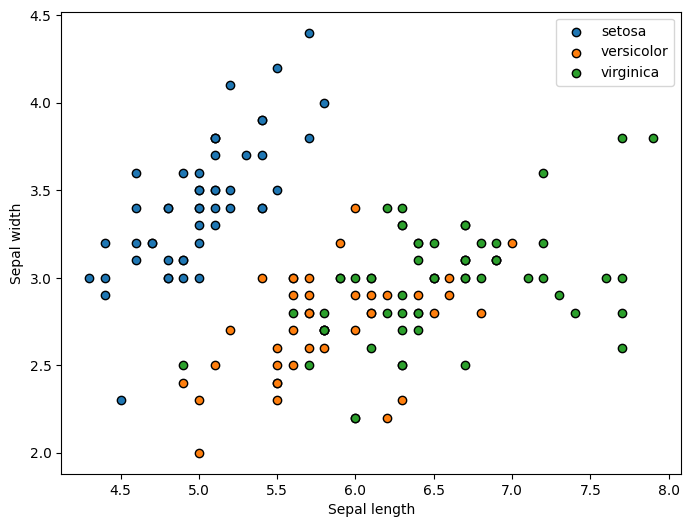

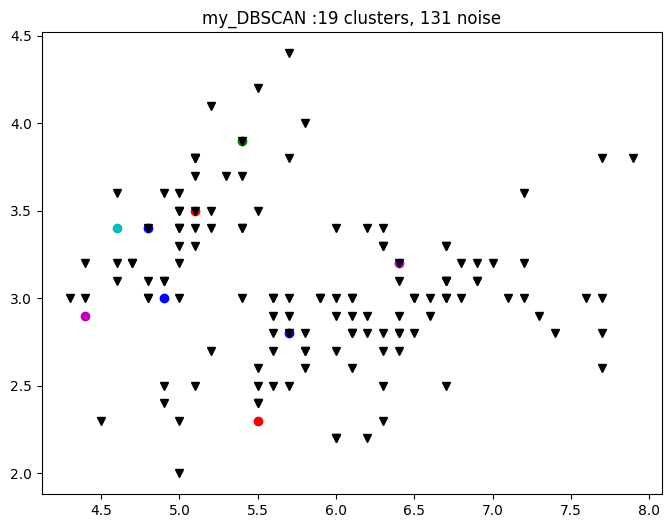

yy len: 150


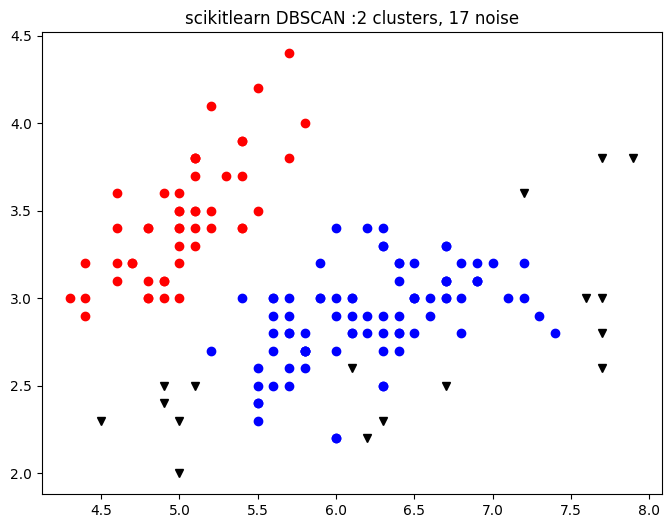

In [30]:

    iris = datasets.load_iris()
    X = iris.data
    y = iris.target

    fig = plt.figure(2, figsize=(8, 6))
    plt.clf()
    plt.scatter(X[0:50, 0], X[0:50, 1], cmap=plt.cm.Set1,edgecolor='k',label=iris.target_names[0])
    plt.scatter(X[50:100, 0], X[50:100, 1], cmap=plt.cm.Set1,edgecolor='k',label=iris.target_names[1])
    plt.scatter(X[100:150, 0], X[100:150, 1], cmap=plt.cm.Set1,edgecolor='k',label=iris.target_names[2])
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.legend(scatterpoints=1)

    eps = 0.5
    minpts = 5
    
    my_y = my_DBSCAN(X,eps,minpts)
    statistiques = np.unique(my_y,return_counts=True)
    K = len(statistiques[0])-(1 if -1 in statistiques[0] else 0)
    Bruit = [p for p in range(len(my_y)) if my_y[p]==-1]
    
    fig = plt.figure(figsize=(8, 6))

    for k in range(1,K+1):
        plt.plot(X[my_y==k, 0], X[my_y==k, 1], colors[k%n_colors]+'o')
    plt.plot(X[my_y==-1, 0], X[my_y==-1, 1], 'kv')

    plt.title('my_DBSCAN :'+str(K)+' clusters, '+str(len(Bruit))+' noise')
    plt.show()

    # comparaison avec DBSCAN de scikit learn
    yy = DBSCAN(eps=eps,min_samples=minpts).fit_predict(X)
    statistiques = np.unique(yy,return_counts=True)
    Noise = [p for p in range(len(yy)) if yy[p]==-1]
    K = len(statistiques[0])-(1 if -1 in statistiques[0] else 0)
    
    print('yy len:',len(yy))
    fig = plt.figure(figsize=(8, 6))
    for k in range(K):
        plt.plot(X[yy==k, 0], X[yy==k, 1], colors[(k+1)%n_colors]+'o')
    plt.plot(X[yy==-1, 0], X[yy==-1, 1], 'kv')

    plt.title('scikitlearn DBSCAN :'+str(K)+' clusters, '+str(len(Noise))+' noise')
    plt.show()    